# ESTUDIO DE FACTORES DE MOTIVACIÓN EN LA COMPRA DE UN VEHÍCULO ELÉCTRICO Y LA IMPLANTACIÓN MASIVA DE ESTOS ENTRE LOS CONDUCTORES
## ELENA DELGADO DEL REY 
## TRABAJO FIN DE GRADO

Este trabajo va sobre los coches eléctricos que se encuentran actualmente en el mercado. En el DataSet utilizado tenemos información de la marca del coche, su modelo, precio, etc... 

# PREPARAR EL ENTORNO

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline 
sns.set_palette('pastel')
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas.util.testing as tm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
# para utilizar lo que tengo en google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A continuación se va a importar la tabla con datos de Vehículos Eléctricos. Nos encontramos la siguiente información: 


*   Brand- Marca 
*   Modelo - Modelo del vehículos 
*   AccelSec - Tiempo que tarda en accelerar 
*   TopSpeed_kmH - Velocidad máxima
*   Range_Km - Autonomia 
*   Efficiency Wh/km - Eficiencia 
*   Charge km/h - Carga rápida del vehiculo 
*   RapidCharge - El vehiculo tiene carga rápida 
*   PowerTrain- Tracción del coche 
*   PlugType - Tipo de cargador
*   BodyStyle - Tipo de vehículo 
*   Segment - A que segmento pertenece el coche 
*   Seats- Número de asientos en el coche
*   PriceEuro - Precio del vehiculo 





# ANÁLISIS EXPLORATORIO

In [ ]:
tabla = pd.read_csv("/content/drive/MyDrive/Cuarto/TFG/Coches/ElectricCarData_Clean.csv")
tabla.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
tabla.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


Vamos a visualizar que tipo de tabla es y cuantos datos tiene

In [ ]:
type(tabla)

pandas.core.frame.DataFrame

In [ ]:
tabla.shape

(103, 14)

### COLUMNAS
Vamos a ver la información de las columnas y limpiar los datos que tenemos

In [ ]:
tabla.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
tabla.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

Vamos a hacer un estudio de los datos que encontramos en el dataset

In [ ]:
tabla.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [ ]:
tabla = tabla[tabla.isnull().sum(axis=1) < (tabla.columns.nunique()/2)] 

### Correlación entre variables

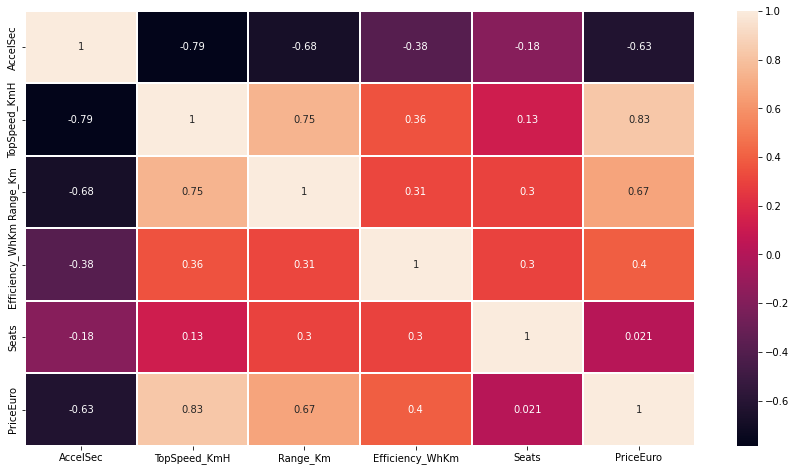

In [ ]:
import seaborn as sb
ax= plt.figure(figsize=(15,8))
sb.heatmap(tabla.corr(),linewidths=1,linecolor='white',annot=True)

Vamos a ver la relación que tienen los coches con el cargador rápido y con el precio. 

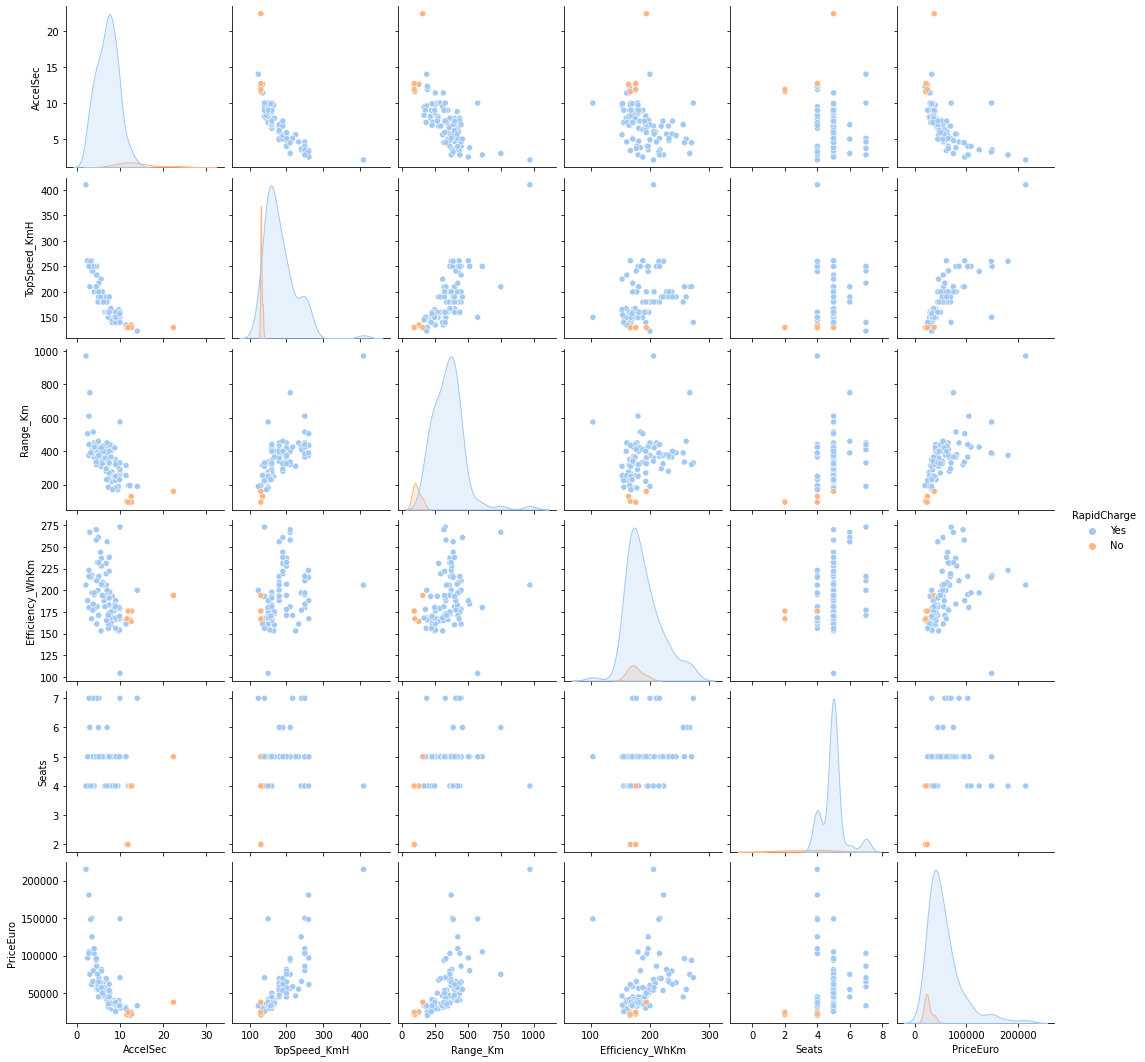

In [ ]:
sb.pairplot(tabla,hue='RapidCharge')

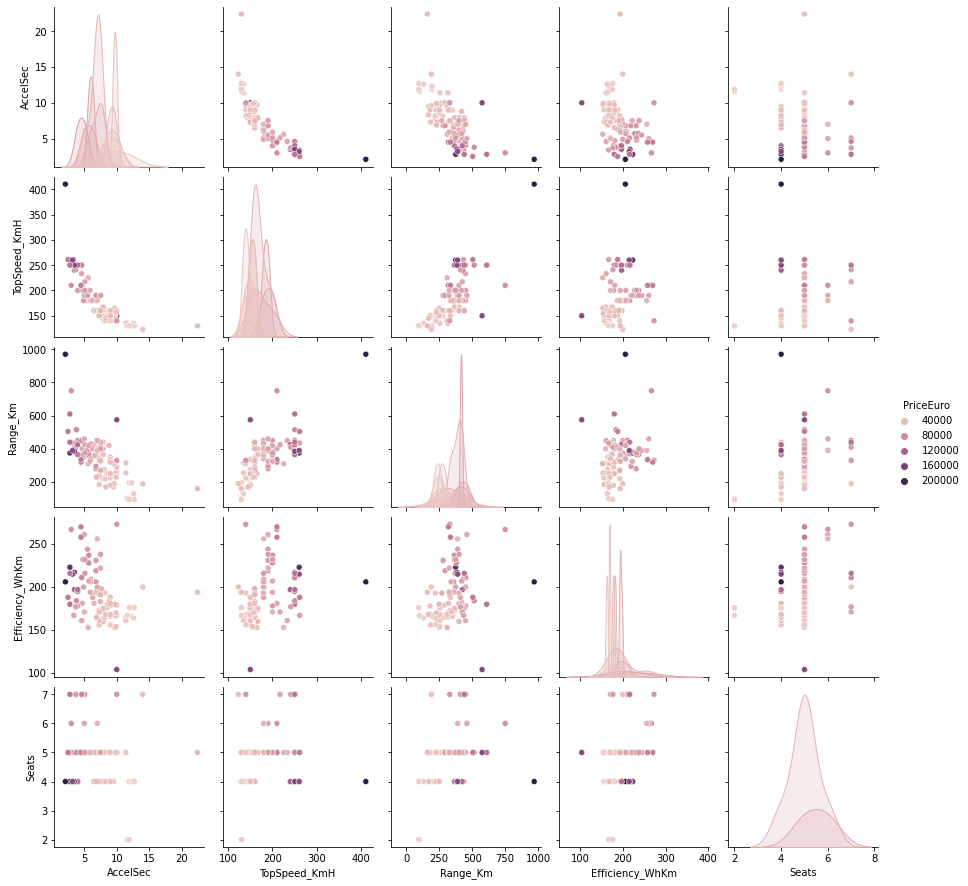

In [ ]:
sb.pairplot(tabla,hue='PriceEuro')

### PRECIOS

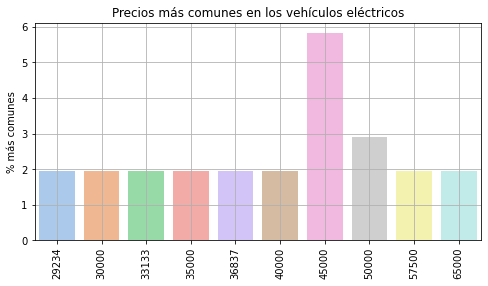

In [ ]:
precios = tabla["PriceEuro"].value_counts().div(len(tabla)).mul(100)
precio_TOP10 = precios[:10]

plt.figure(figsize=(8,4))
sns.barplot(x=precio_TOP10.index, y=precio_TOP10.values)
plt.grid(True)
plt.title("Precios más comunes en los vehículos eléctricos")
plt.ylabel("% más comunes")
plt.xticks(rotation=90)
plt.show()

In [ ]:
tabla.PriceEuro.min()

20129

In [ ]:
tabla.PriceEuro.max()

215000

Text(0.5, 1.0, 'Análisis de los precios en loc vehículos eléctricos')

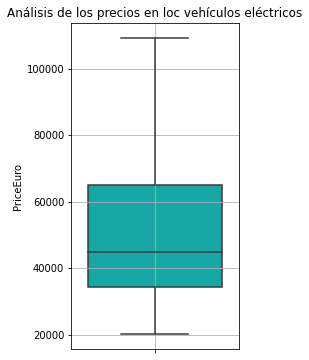

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y='PriceEuro', data=tabla, showfliers=False, color='c');
plt.grid(True)
plt.title("Análisis de los precios en loc vehículos eléctricos")

Podemos ver que mayoritariamente los vehículos eléctricos rondan los 45000€. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

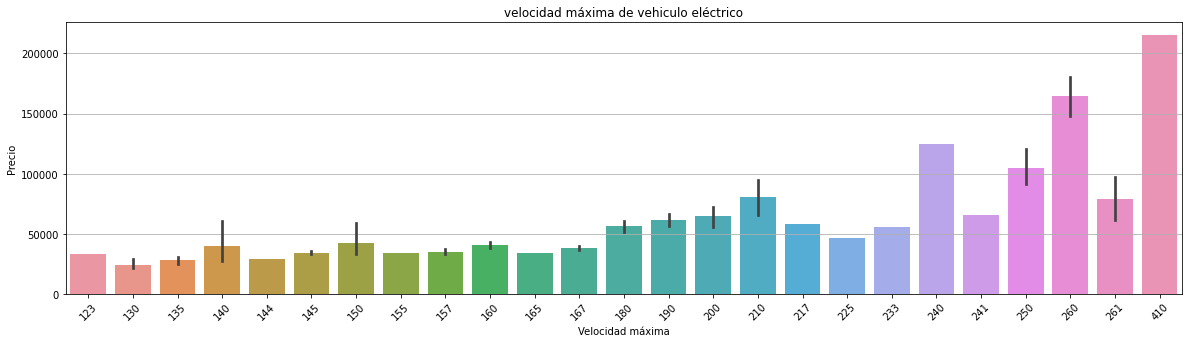

In [ ]:
velocidad= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='TopSpeed_KmH',y='PriceEuro',data=tabla)
plt.grid(axis='y')
plt.title('velocidad máxima de vehiculo eléctrico')
plt.xlabel('Velocidad máxima')
plt.ylabel('Precio')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

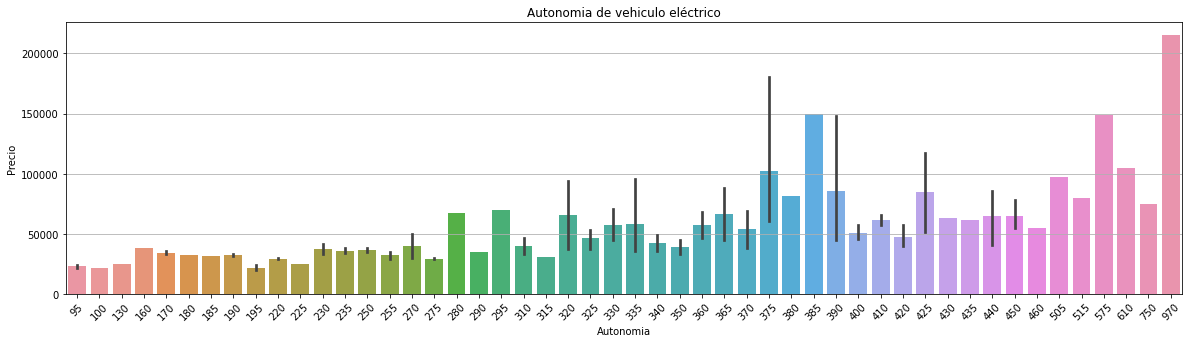

In [ ]:
autonomia= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Range_Km',y='PriceEuro',data=tabla)
plt.grid(axis='y')
plt.title('Autonomia de vehiculo eléctrico')
plt.xlabel('Autonomia')
plt.ylabel('Precio')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

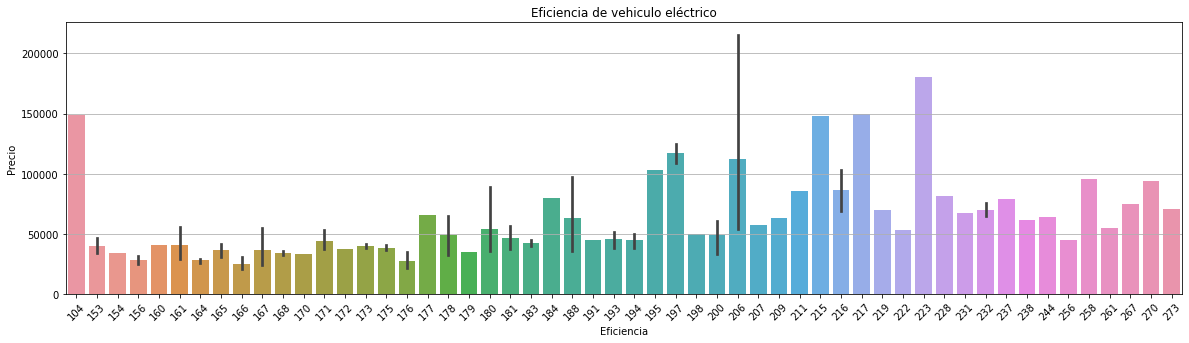

In [ ]:
eficiencia= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Efficiency_WhKm',y='PriceEuro',data=tabla)
plt.grid(axis='y')
plt.title('Eficiencia de vehiculo eléctrico')
plt.xlabel('Eficiencia')
plt.ylabel('Precio')
plt.xticks(rotation=45)

MARCA Y MODELO 

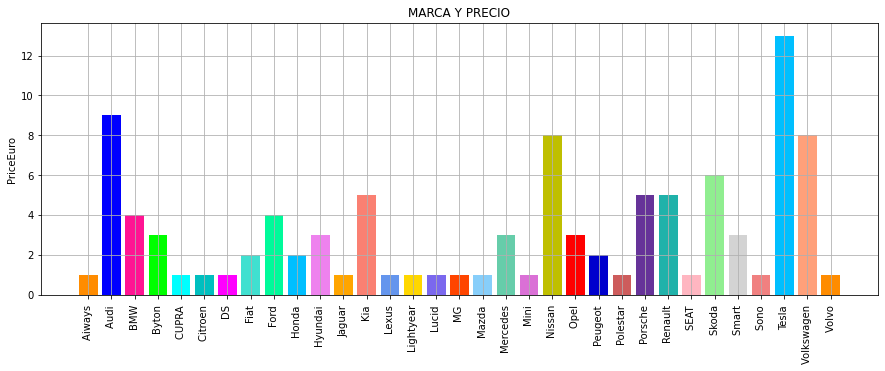

In [ ]:
marca = tabla.groupby("Brand")["PriceEuro"].count()
plt.figure(figsize=(15,5))
plt.bar(marca.index, marca, color=['darkorange','blue','deeppink','lime','aqua','c','magenta','turquoise','mediumspringgreen',
                                      'deepskyblue','violet','orange','salmon','cornflowerblue','gold','mediumslateblue','orangered',
                                      'lightskyblue','mediumaquamarine','orchid','y','red','mediumblue','indianred','rebeccapurple',
                                      'lightseagreen','lightpink','lightgreen','lightgrey','lightcoral','deepskyblue','lightsalmon'])
plt.title("MARCA Y PRECIO")
plt.ylabel("PriceEuro")
plt.xticks(rotation=90)
plt.grid(True) 
plt.show()

Podemos ver que actualmente Tesla es la marca con mayor precio de mercado, seguido de Audi y en tercer puesto nos encontramos Volkswagen y Nissan.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

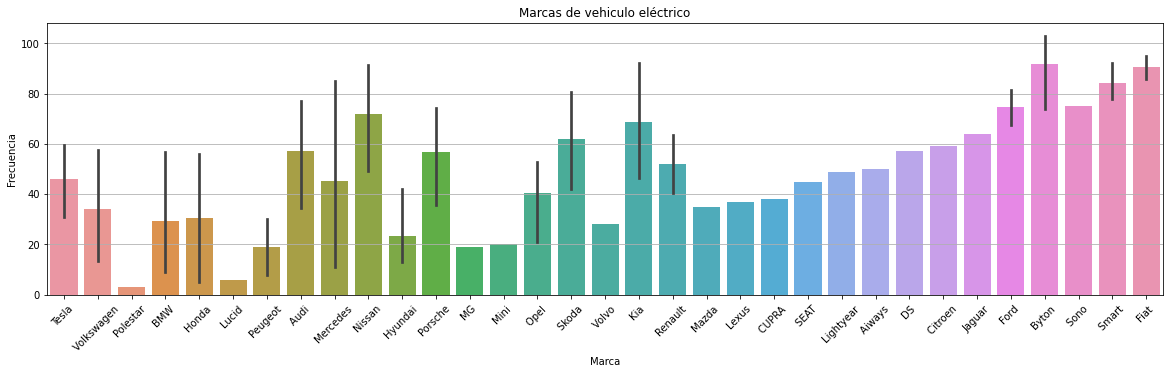

In [ ]:
marca= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Brand',y=array,data=tabla)
plt.grid(axis='y')
plt.title('Marcas de vehiculo eléctrico')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

Vemos que la marca con mayor frecuencia de mercado es Byton, una marca China-Alemana

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text major ticklabel objects>)

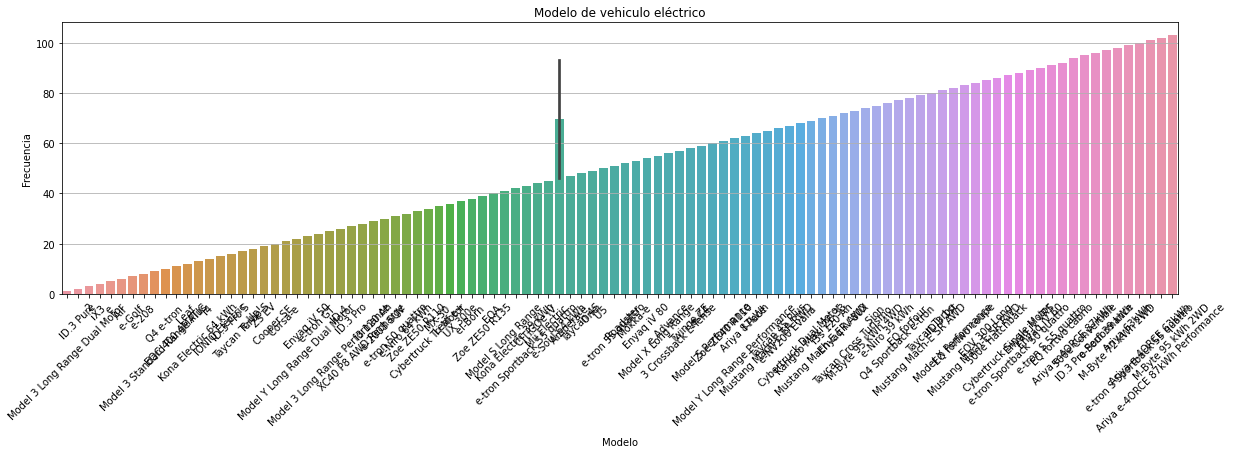

In [ ]:
modelo= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Model',y=array,data=tabla)
plt.grid(axis='y')
plt.title('Modelo de vehiculo eléctrico')
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

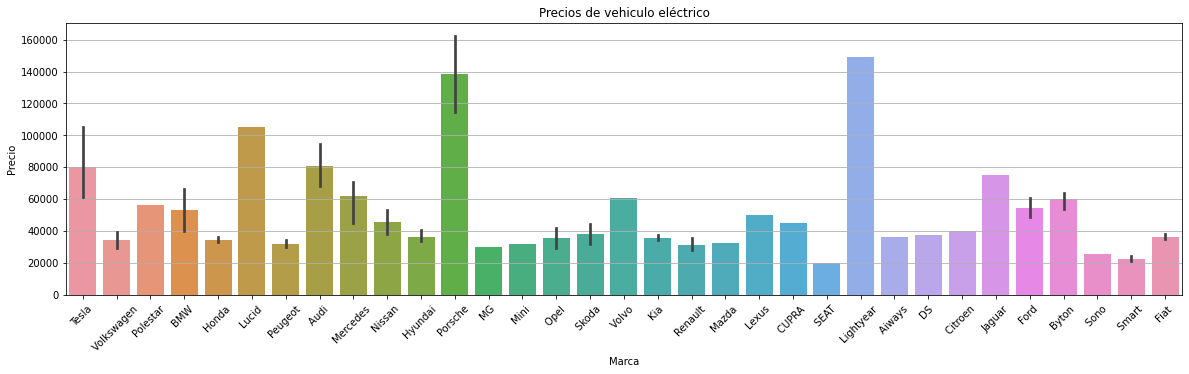

In [ ]:
precio= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Brand',y='PriceEuro',data=tabla)
plt.grid(axis='y')
plt.title('Precios de vehiculo eléctrico')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

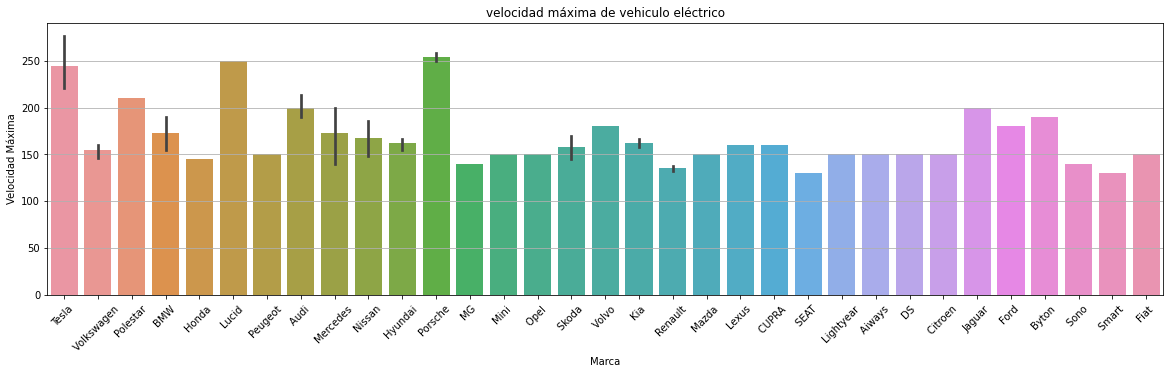

In [ ]:
velocidad= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Brand',y='TopSpeed_KmH',data=tabla)
plt.grid(axis='y')
plt.title('velocidad máxima de vehiculo eléctrico')
plt.xlabel('Marca')
plt.ylabel('Velocidad Máxima')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

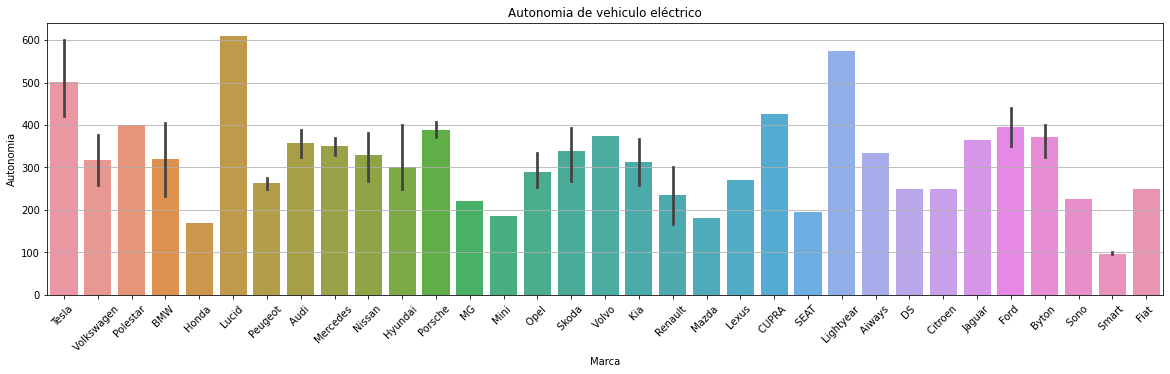

In [ ]:
autonomia= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Brand',y='Range_Km',data=tabla)
plt.grid(axis='y')
plt.title('Autonomia de vehiculo eléctrico')
plt.xlabel('Marca')
plt.ylabel('Autonomia')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

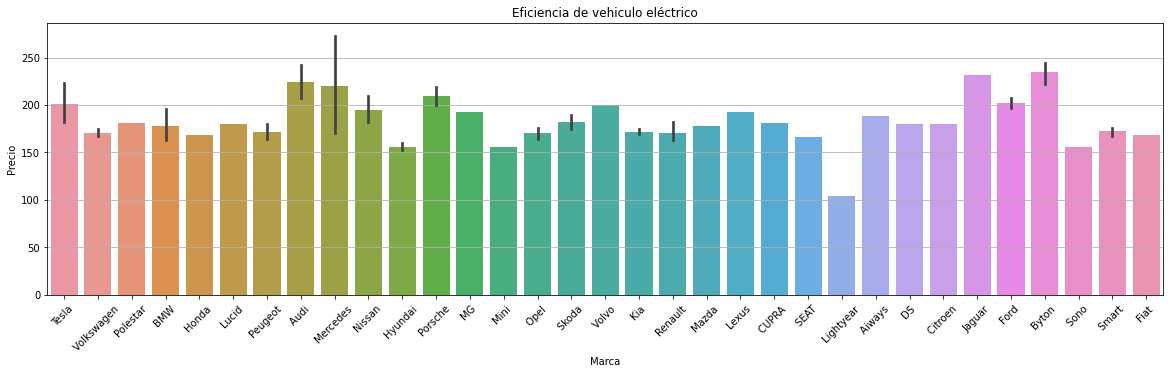

In [ ]:
eficiencia= plt.figure(figsize=(20,5))
array=np.arange(1,104)
sb.barplot(x='Brand',y='Efficiency_WhKm',data=tabla)
plt.grid(axis='y')
plt.title('Eficiencia de vehiculo eléctrico')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=45)

VARIABLES 

Text(0.5, 1.0, 'Asientos')

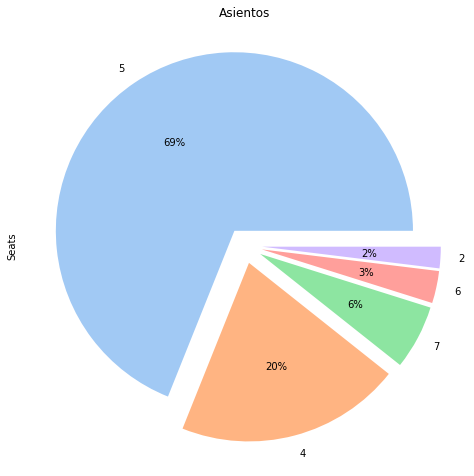

In [ ]:
tabla['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Asientos')

Text(0.5, 1.0, 'Tipo cargador')

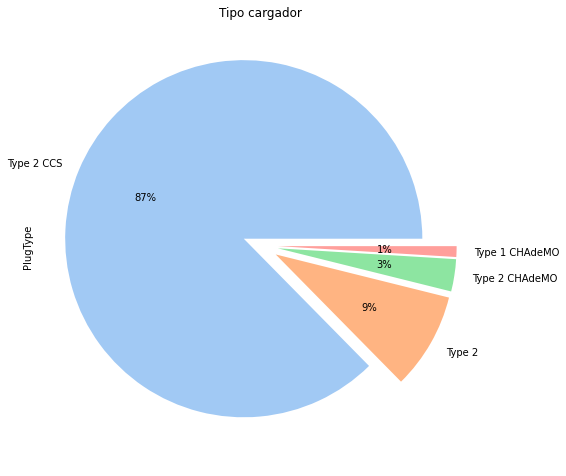

In [ ]:
tabla['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Tipo cargador')

Text(0.5, 1.0, 'Tipo de vehiculo')

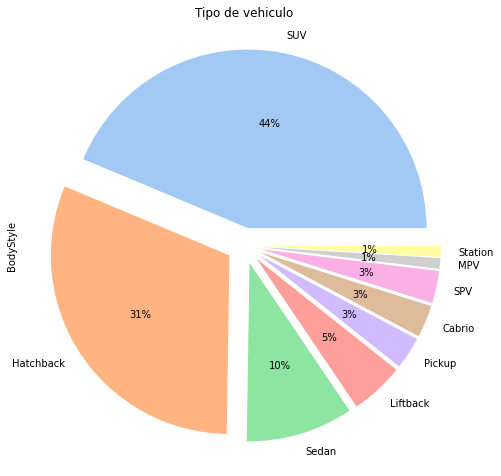

In [ ]:
tabla['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Tipo de vehiculo')

# REGRESIÓN LINEAL

A continuación vamos a preparar el dataset pata hacer una regressión, indicando valores de x (variables independientes) y el valor de y (variable dependiente)

In [ ]:
tabla.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 16.1+ KB


Vamos a coger el valor de carga rápida e implementarlo como 0 y 1

In [ ]:
tabla['RapidCharge'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)

Las variables independientes para el modelo van a ser las siguientes:


*   Acceleración
*   Máxima velocidad 
*   Rango 
*   Eficiencia 

La variable dependiente va a ser la siguiente: 

*   Precio



In [ ]:
import statsmodels.api as sm

In [ ]:
x=tabla[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm']]
y=tabla[['PriceEuro']]

### MÉTODO DE MÍNIMOS CUADRADOS

El método de mínimos cuadrados, se usa para estimar la relación entre una o varias variables independientes cuantitativas y una variable dependiente. 

In [ ]:
x=sm.add_constant(x)
resultado=sm.OLS(y,x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
modelo=resultado.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.37e-25
Time:                        14:30:20   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regresión lineal 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.3,random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(x_train, y_train)
prediccion= lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score  
r2=(r2_score(y_test,prediccion))
print(r2*100)

79.74475540243121


Con este modelo utilizando el 30% para el testo de los datos y un random_state de 100 (semilla para el generador de números aleatorios, qe permite reproducir la función). Esto nos indica que un 79.7% de las variables dependientes se ven explicadas por la variable independiente. 

### Regresión logistica

In [ ]:
xl=tabla[['PriceEuro']]
yl=tabla[['RapidCharge']]

In [ ]:
from sklearn.model_selection import train_test_split
xl_train, xl_test, yl_train, yl_test = train_test_split(xl,yl, test_size=0.3, random_state=100 )

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression()

In [ ]:
logr.fit(xl_train,yl_train)
predlog=logr.predict(xl_test)
predlog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Vamos a utilizar la matriz de regresión, para ver como ha funcionado nuestro algoritmo 

In [ ]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(yl_test, predlog)
matriz

array([[ 0,  2],
       [ 0, 29]])

In [ ]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(yl_test,predlog)
accu*100

93.54838709677419

Nos encontramos con un accurazy de 93,5%